<a href="https://colab.research.google.com/github/anirudh4git/Repository-for-different-functions/blob/main/Bias_Variance_Tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b> The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per \$10,000
* PTRATIO - pupil-teacher ratio by town
* B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
* LSTAT - % lower status of the population
* MEDV - Median value of owner-occupied homes in $1000's

## <b>MEDV is the dependent variable.

## Fit polynomial regression on this dataset for degrees 1 to 10. To do such a regression, consider only one variable and then run polynomial fit and plot the train and test errors w.r.t model complexity. You can also repeat this experiment for all the other variables. Also do not use <code>np.polyfit</code>function, but use the <code>LinearRegression()</code> using the scikit-learn library.</b>

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Machine Learning/Linear Regression I/housing - housing.csv',names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
                                                                                                                         'DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    object 
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB


In [ ]:
df['ZN'] = df['ZN'].str.replace(' ','').astype(float)

In [ ]:
df.drop('CHAS',axis = 1,inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   NOX      506 non-null    float64
 4   RM       506 non-null    float64
 5   AGE      506 non-null    float64
 6   DIS      506 non-null    float64
 7   RAD      506 non-null    int64  
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(11), int64(2)
memory usage: 51.5 KB


In [ ]:
def regression_degree_1_to_10 (col):

  ''' A function to find training error and testing error for each of
     1 to 10 polynomial degrees of each variable of the boston data set 
      with the dependent "MEDV" variable'''

  model_poly_degrees = range(1,11)

  # Creating the values of x and y
  x = df[col].values
  y = df['MEDV'].values

 
  # Empty list for errors of all degrees
  train_error_list = []
  test_error_list = []

  for deg in model_poly_degrees:
    
    poly_nd = PolynomialFeatures(degree = deg)

    #splittig into train and test
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
    
    # Scaling
    x_train = poly_nd.fit_transform(x_train.reshape(-1,1))
    x_test  = poly_nd.transform(x_test.reshape(-1,1))

    #fitting
    model = LinearRegression().fit(x_train,y_train)

    #Predicting our Dependent Variable
    y_pred_train = model.predict(x_train)
    y_pred_test  = model.predict(x_test)

    #Calculating the errors for each iteration
    train_error = np.sqrt(mean_squared_error(y_train,y_pred_train))
    test_error  = np.sqrt(mean_squared_error(y_test,y_pred_test))

    # Appending errors to make a list
    train_error_list.append(train_error)
    test_error_list.append(test_error)

  best_model_degree = model_poly_degrees[np.argmin(test_error_list)]
  return train_error_list,test_error_list, best_model_degree,col


In [ ]:
def plot_error_lines (our_input):
  '''Function to plot the training and testing errors for each degree of
      a particular variable'''
  model_poly_degrees = range(1,11)
  plt.plot(model_poly_degrees, our_input[0], label='Training Set Error', linewidth=2, color='darkred')
  plt.plot(model_poly_degrees, our_input[1], label='Testing Set Error', linewidth=2, color='black')
  plt.axvline(our_input[2], linestyle='--', color='black', label=f'Best Model(degree={our_input[2]})')
  plt.xlabel('(Polynomial Degree)' + 'for  '+ our_input[3])
  plt.title(our_input[3])
  plt.legend(loc='upper center')


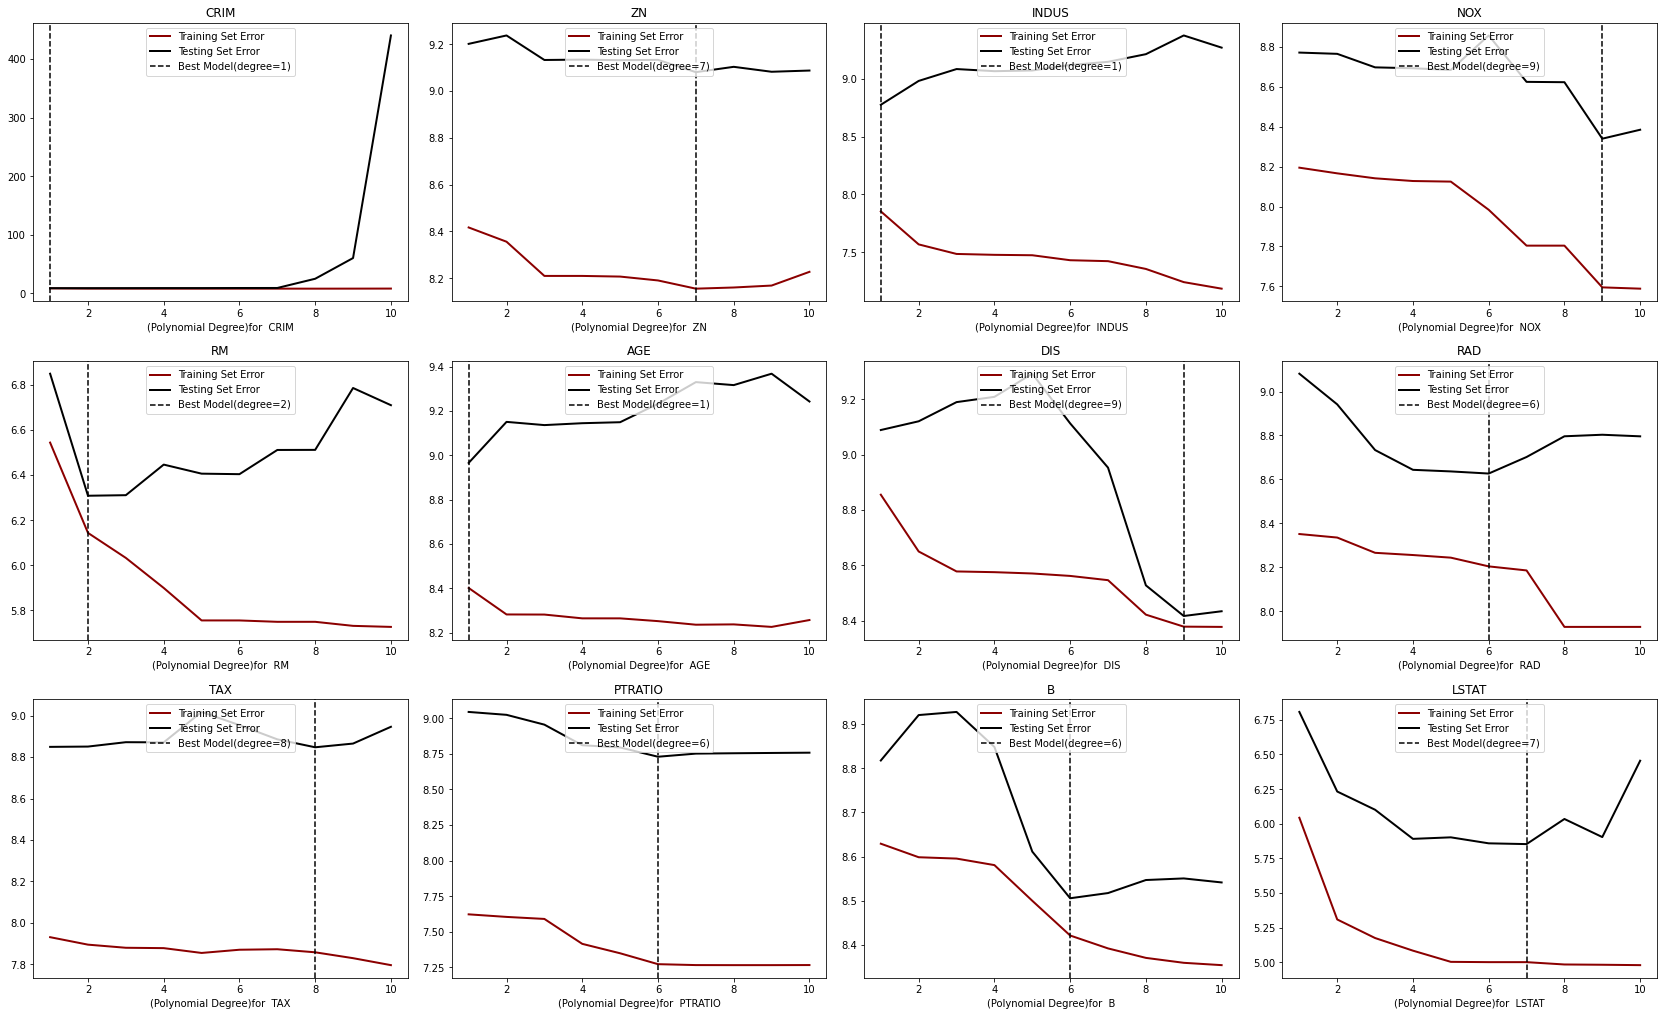

In [ ]:
fig, axes = plt.subplots(3,4,figsize = (23,14),constrained_layout = True)

for i in range(3):
  for j in range(4):
    index = i*4 + j
    plt.sca(axes[i][j])
    plot_error_lines(regression_degree_1_to_10(df.columns[index]))

## ROUGH WORK

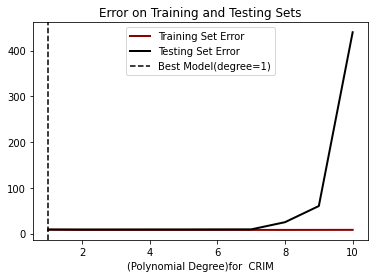

In [ ]:
plot_error_lines(regression_degree_1_to_10('CRIM'))

In [ ]:
for deg in model_poly_degrees:
  print(Poly_degrees_regression(deg,'CRIM'))

(8.411412261609833, 8.739950890963904)
(8.032280523723987, 8.753046919005445)
(7.965533236692297, 8.817767683041115)
(7.941822598534645, 8.898679970914772)
(7.941605504960992, 8.898092834603787)
(7.935443046530281, 9.03458315632975)
(7.9353687762206215, 9.082520981449377)
(7.9148851621779235, 24.82754280735595)
(7.970909771489147, 60.1724616663931)
(8.052946438488387, 440.20914112838216)


In [ ]:
poly1d = PolynomialFeatures(degree = 1)
x1 = poly1d.fit_transform(np.array(df.CRIM).reshape(-1,1))

In [ ]:
ff = LinearRegression().fit(x1,df.MEDV)

In [ ]:
g = ff.predict(x1)

In [ ]:
g

In [ ]:
df.MEDV

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

In [ ]:
ff.coef_

array([ 0.        , -0.41519028])

In [ ]:
def error_function(pred, actual):
    return (pred - actual) ** 2

In [ ]:
error_function(np.array([2,1]),np.array([4,4]))

array([4, 9])

In [ ]:
x1

array([[1.00000000e+00, 6.32000000e-03, 3.99424000e-05],
       [1.00000000e+00, 2.73100000e-02, 7.45836100e-04],
       [1.00000000e+00, 2.72900000e-02, 7.44744100e-04],
       ...,
       [1.00000000e+00, 6.07600000e-02, 3.69177760e-03],
       [1.00000000e+00, 1.09590000e-01, 1.20099681e-02],
       [1.00000000e+00, 4.74100000e-02, 2.24770810e-03]])

In [ ]:
np.array(df.CRIM).reshape(-1,1)

In [ ]:
g1,g2 = PolynomialFeatures(degree = 1), PolynomialFeatures(degree = 2)

In [ ]:
g1

PolynomialFeatures(degree=1, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
g2

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [ ]:
df['CRIM'].values

In [ ]:
Poly_degrees_regression()

(4.982546853888519, 5.904003555622304)

In [ ]:
regression_degree_1_to_10('CRIM')

([8.411412261609833,
  8.032280523723987,
  7.965533236692297,
  7.941822598534645,
  7.941605504960992,
  7.935443046530281,
  7.9353687762206215,
  7.9148851621779235,
  7.970909771489147,
  8.052946438488387],
 [8.739950890963904,
  8.753046919005445,
  8.817767683041115,
  8.898679970914772,
  8.898092834603787,
  9.03458315632975,
  9.082520981449377,
  24.82754280735595,
  60.1724616663931,
  440.20914112838216])

In [ ]:
regression_degree_1_to_10('RM')

([6.543735855131036,
  6.143739005709899,
  6.032881463916812,
  5.899868325387756,
  5.7559640002308665,
  5.755876685230186,
  5.7498138026095775,
  5.749813668613594,
  5.731916472019563,
  5.727293553095487],
 [6.848894190115316,
  6.308306521066206,
  6.31076557069088,
  6.446233448746944,
  6.406113375666647,
  6.403840800499964,
  6.511075533037402,
  6.51146444012952,
  6.785558546785418,
  6.70945089817881],
 2,
 'RM')